# Visualization of processing times per machine

In [1]:
import os
import collections
import numpy as np


In [3]:
# 1. Create an array of filenames per data-folder,
# so it's easier to iterate through the benchmark files

def get_all_file_paths(data_folder: str, absolute_paths=True):
    '''
    Get all file paths in data_folder. Get absolute path to files
    if absolute_paths=True
    '''
    # Ensure the data_folder is a valid directory
    if not os.path.isdir(data_folder):
        raise ValueError(f"The specified path '{data_folder}' is not a valid directory.")

    # List all files and directories in the specified folder
    filenames = os.listdir(data_folder)
    
    # If you want to include the full path of each file
    if absolute_paths:
        absolute_paths = [os.path.abspath(os.path.join(data_folder, file)) for file in filenames]
        return absolute_paths

    relative_paths = [os.path.join(data_folder, file) for file in filenames]
    return relative_paths

In [4]:
demirkol_paths = get_all_file_paths("../data/demirkol")
print(f"Demirkol paths: {demirkol_paths}")
print(f"Number of Demirkol instances: {len(demirkol_paths)}")

taillard_paths = get_all_file_paths("../data/taillard")
print(f"Taillard paths: {taillard_paths}")
print(f"Number of Taillard instances: {len(taillard_paths)}")

extra_paths = get_all_file_paths("../data/extra")
print(f"Extra paths: {extra_paths}")
print(f"Number of Extra instances: {len(extra_paths)}")

Demirkol paths: ['/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu47_cscmax_20_20_4.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu33_rcmax_50_15_2.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu69_cscmax_40_20_5.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu16_rcmax_30_20_7.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu68_cscmax_40_20_8.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu49_cscmax_20_20_2.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu9_rcmax_20_20_8.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu4_rcmax_20_15_8.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu24_rcmax_40_15_8.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu67_cscmax_40_20_6.txt', '/Users/cschmidl/phd/repos/job-shop-scheduling/data/demirkol/dmu17_rcmax_30_20_10.txt', '/Users/cschmidl/phd/r

In [5]:
def load_instance_as_list(file_path: str):
    '''
    returns:
        - nr_of_jobs: str
        - nr_of_machines: str
        - operations: List
            [
            [(machine_id processing_time),(),(),()], <-- job 1
            [(),(),(),()], <-- job 2
            ...
            ]
    '''
    print(f"Loading: {file_path}...\n")
    with open(file_path) as f:
        lines = f.readlines()

    first_line = lines[0].split()

    # Number of jobs
    nr_of_jobs = int(first_line[0])
    # Number of machines. This is also often referred to as number of operations
    nr_of_machines = int(first_line[1])

    #stripped_list = [] # removed new line chars \n
    job_list = [ [] for _ in range(nr_of_jobs) ] # Create nest list with nr_of_jobs arrays

    job_list_index = 0
    for line in lines[1:]: # do not include the first row (that's meta info)
        stripped_line = line.strip()
        elements = stripped_line.split() # elements = array containing every integer of the given job
        for i in range(0, len(elements), 2):
            machine_id = int(elements[i])
            processing_time = int(elements[i+1])
            job_list[job_list_index].append((machine_id, processing_time))
        job_list_index += 1

    return nr_of_jobs, nr_of_machines, job_list

In [14]:
# 2.) Taillard: Load every instance in a loop.
# and create a dictionary with machine id as key.
# The dict value is a list of processing times

# Key: machine_id
# value: array of processing times
taillard_processing_times_dict = collections.defaultdict(list)
demirkol_processing_times_dict = collections.defaultdict(list)

# Taillard
for taillard_path in taillard_paths:
    nr_of_jobs, nr_of_machines, job_list = load_instance_as_list(taillard_path)
    print(f"Loaded instance: {taillard_path}")
    print(f"Nr of jobs: {nr_of_jobs}, Nr of machines: {nr_of_machines}")
    #print(f"Job list: {job_list}") # nested job-array containing operation tuples
    taillard_operations = sum(job_list, []) # one dimensional array of all operation tuples
    #print(f"Flattened operations list: {operations}") 
    for operation in taillard_operations:
        taillard_processing_times_dict[operation[0]].append(operation[1])

# Demirkol
for demirkol_path in demirkol_paths:
    nr_of_jobs, nr_of_machines, job_list = load_instance_as_list(demirkol_path)
    print(f"Loaded instance: {demirkol_path}")
    print(f"Nr of jobs: {nr_of_jobs}, Nr of machines: {nr_of_machines}")
    #print(f"Job list: {job_list}") # nested job-array containing operation tuples
    demirkol_operations = sum(job_list, []) # one dimensional array of all operation tuples
    #print(f"Flattened operations list: {operations}") 
    for operation in demirkol_operations:
        demirkol_processing_times_dict[operation[0]].append(operation[1])

print(taillard_processing_times_dict.keys())
print(demirkol_processing_times_dict.keys())

print(f"Mean of processing times per machine...")

for key, value in taillard_processing_times_dict.items():
    print("Taillard instance.")
    print(f"Machine: {key}")
    print(f"Mean: {np.mean(value)}")
    print(f"Variance: {np.var(value)}")
    print(f"Std: {np.std(value)}")
    print(f"Min value: {np.min(value)}")
    print(f"Max value: {np.max(value)}")

Loading: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta26.txt...

Loaded instance: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta26.txt
Nr of jobs: 20, Nr of machines: 20
Loading: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta32.txt...

Loaded instance: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta32.txt
Nr of jobs: 30, Nr of machines: 15
Loading: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta3.txt...

Loaded instance: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta3.txt
Nr of jobs: 15, Nr of machines: 15
Loading: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta2.txt...

Loaded instance: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta2.txt
Nr of jobs: 15, Nr of machines: 15
Loading: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta33.txt...

Loaded instance: /Users/cschmidl/phd/repos/job-shop-scheduling/data/taillard/ta33.txt
Nr of jobs: 30, Nr of ma

In [15]:
for key, value in demirkol_processing_times_dict.items():
    print("Demirkol instance.")
    print(f"Machine: {key}")
    print(f"Mean: {np.mean(value)}")
    print(f"Variance: {np.var(value)}")
    print(f"Std: {np.std(value)}")
    print(f"Min value: {np.min(value)}")
    print(f"Max value: {np.max(value)}")

Demirkol instance.
Machine: 7
Mean: 101.1825
Variance: 3377.7470508928577
Std: 58.11838823378413
Min value: 1
Max value: 200
Demirkol instance.
Machine: 3
Mean: 98.24178571428571
Variance: 3382.6804682397956
Std: 58.16081557405979
Min value: 1
Max value: 200
Demirkol instance.
Machine: 6
Mean: 99.72071428571428
Variance: 3371.699142346939
Std: 58.06633398404741
Min value: 1
Max value: 200
Demirkol instance.
Machine: 1
Mean: 100.93857142857142
Variance: 3422.421226530612
Std: 58.50146345631545
Min value: 1
Max value: 200
Demirkol instance.
Machine: 5
Mean: 100.20428571428572
Variance: 3303.8146959183673
Std: 57.478819541796156
Min value: 1
Max value: 200
Demirkol instance.
Machine: 4
Mean: 100.11821428571429
Variance: 3276.949239668367
Std: 57.24464376400964
Min value: 1
Max value: 200
Demirkol instance.
Machine: 9
Mean: 97.54178571428571
Variance: 3318.188968239796
Std: 57.60372356228194
Min value: 1
Max value: 200
Demirkol instance.
Machine: 8
Mean: 100.74178571428571
Variance: 3299.9

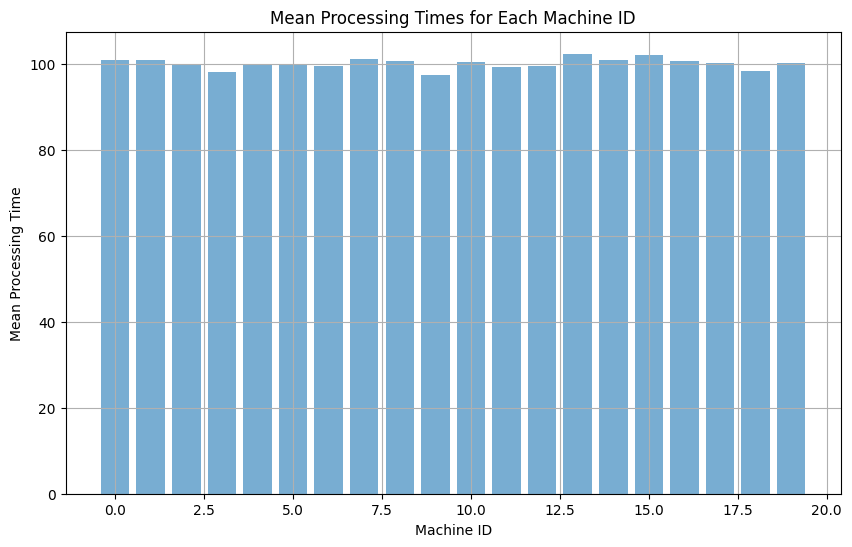

In [16]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Calculate the mean processing time for each machine ID
machine_ids = []
mean_processing_times = []

for machine_id, times in demirkol_processing_times_dict.items():
    machine_ids.append(machine_id)
    mean_processing_times.append(np.mean(times))

# Plot the mean processing times
plt.figure(figsize=(10, 6))
plt.bar(machine_ids, mean_processing_times, alpha=0.6)
plt.xlabel('Machine ID')
plt.ylabel('Mean Processing Time')
plt.title('Mean Processing Times for Each Machine ID')
plt.grid(True)
plt.show()

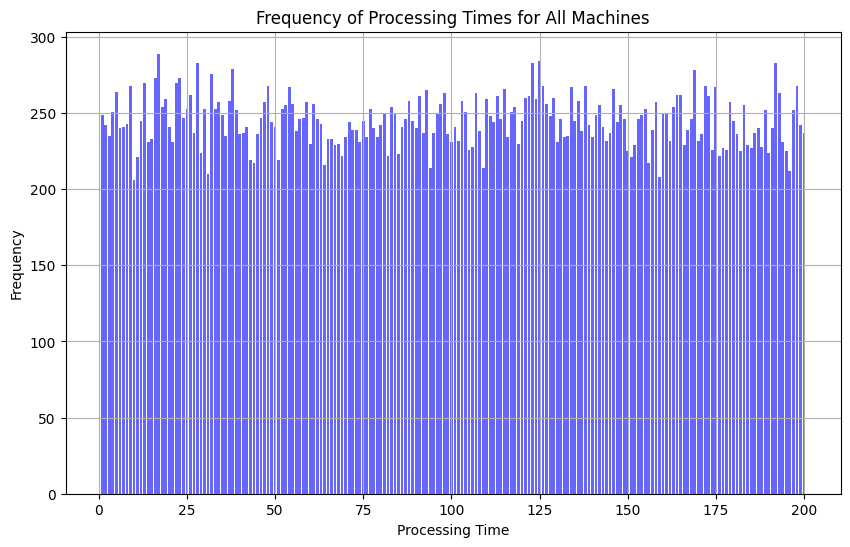

In [17]:
import scipy.stats as stats

# Combine all processing times into one list
all_processing_times = []
for times in demirkol_processing_times_dict.values():
    all_processing_times.extend(times)

# Calculate the frequency of each processing time
processing_time_counts = collections.Counter(all_processing_times)

# Prepare data for bar chart
processing_times = list(processing_time_counts.keys())
frequencies = list(processing_time_counts.values())

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(processing_times, frequencies, alpha=0.6, color='b')

plt.xlabel('Processing Time')
plt.ylabel('Frequency')
plt.title('Frequency of Processing Times for All Machines')
plt.grid(True)
plt.show()

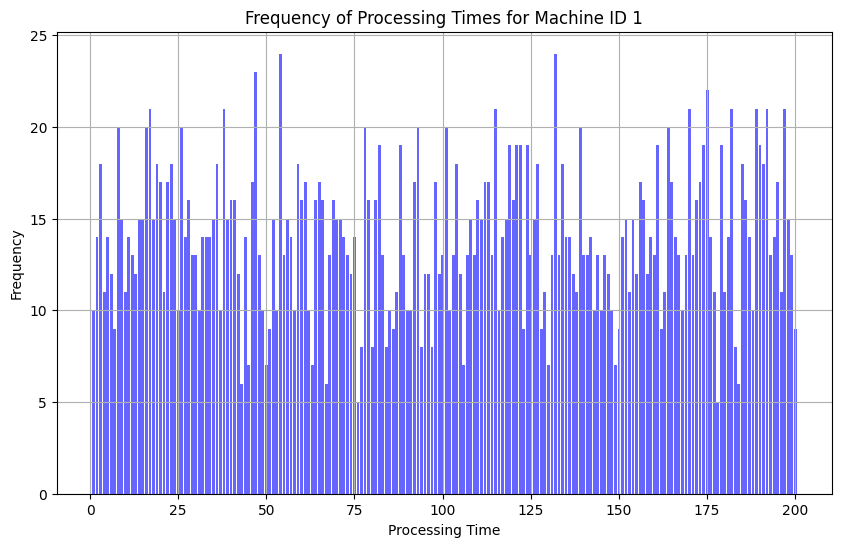

In [18]:
# Extract processing times for machine ID 1
processing_times_machine_1 = demirkol_processing_times_dict[1]

# Calculate the frequency of each processing time for machine ID 1
processing_time_counts_1 = collections.Counter(processing_times_machine_1)

# Prepare data for bar chart
processing_times_1 = list(processing_time_counts_1.keys())
frequencies_1 = list(processing_time_counts_1.values())

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(processing_times_1, frequencies_1, alpha=0.6, color='b')

plt.xlabel('Processing Time')
plt.ylabel('Frequency')
plt.title('Frequency of Processing Times for Machine ID 1')
plt.grid(True)
plt.show()